# Library

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator

# Data File

In [26]:
apo_double_s_file          = 'data/apo_double_s_D34_D214_stage_11_to_65.dat'
apo_sw_fit_file            = 'data/apo_stepwise_fit_stage_11_to_65.dat'
apo_prot_state_combos_file = 'data/apo_D34_D214_prot_state_combos_stage_11_to_65.dat'
holo_double_s_file          = 'data/holo_double_s_D34_D214_stage_21_to_42.dat'
holo_sw_fit_file            = 'data/holo_stepwise_fit_stage_21_to_42.dat'
holo_prot_state_combos_file = 'data/holo_D34_D214_prot_state_combos_stage_21_to_42.dat'

# Collect Data

In [27]:
def data_collect(file):
    data = []
    with open(file, 'r') as f:
        for line in f:
            if '#' not in line:
                split_line = re.split('\s+', line)
                split_line = split_line[:-1]
                dat_list = [np.float(dat) for dat in split_line]
                data.append(dat_list)
    return data

In [28]:
apo_double_s_data           = data_collect(apo_double_s_file)
apo_sw_fit_data             = data_collect(apo_sw_fit_file)
apo_prot_state_combos_data  = data_collect(apo_prot_state_combos_file)
holo_double_s_data          = data_collect(holo_double_s_file)
holo_sw_fit_data            = data_collect(holo_sw_fit_file)
holo_prot_state_combos_data = data_collect(holo_prot_state_combos_file)

In [52]:
data_list = [apo_double_s_data, apo_sw_fit_data, apo_prot_state_combos_data, holo_double_s_data, holo_sw_fit_data, holo_prot_state_combos_data]
name_list = ['Apo Stepwise pKas', 'Holo Stepwise pKas', 'Apo Prot. State Combos', 'Holo Prot. State  Combos']

# Plot Data Settings

## Colors

In [53]:
C1 = ('#FF0000') # Red
C2 = ('#FF8000') # Orange
C2 = ('#FFFF00') # Yellow
C3 = ('#00FF00') # Green
C4 = ('#A100FF') # Purple 
C5 = ('#FF00DE') # Pink 
C6 = ('#00CFFF') # Cyan
C7 = ('#3000FF') # Blue
black = ('Black')
colors1 = [C1, C2, C3, C4, black]
colors2 = [C1, C2, C3, C4, C5, C6, black]

## Global Settings

In [54]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

## Params for Inkscape

In [55]:
ink_x = 1.4 # 1.4
ink_y = 1.4 # 1.4

ink_markersize  = 2
ink_linewidth = 0.5

# Make Plots

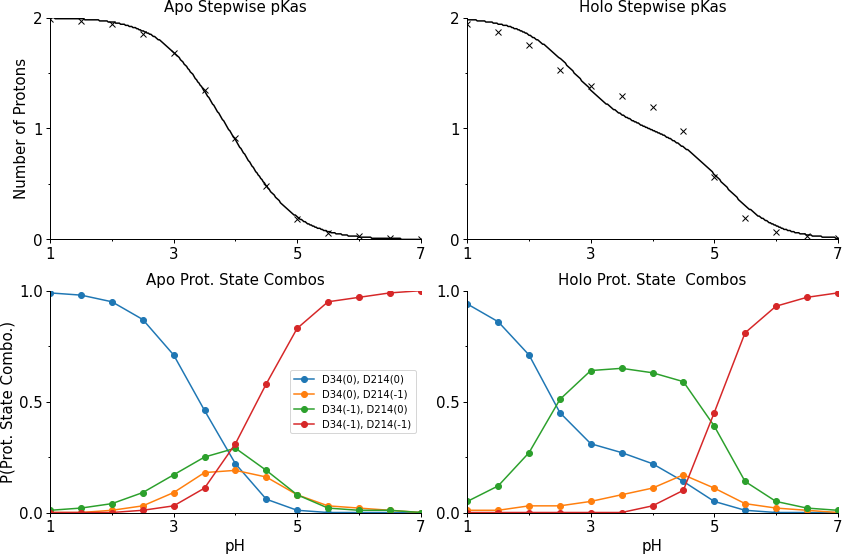

In [57]:
# Fold Cell
plt.close('all')

figcols = 2
figrows = 2

fig, axes = plt.subplots(nrows=figrows, ncols=figcols, figsize=(12, 8))
axes = axes.flatten()

for index in range(figcols*figrows):
    # Data
    if index == 0:
        axes[index].plot([x[0] for x in data_list[0]],[y[1] for y in data_list[0]], 'xk')
        axes[index].plot([x[0] for x in data_list[1]],[y[1] for y in data_list[1]], '-k')
    if index == 1:
        axes[index].plot([x[0] for x in data_list[3]],[y[1] for y in data_list[3]], 'xk')
        axes[index].plot([x[0] for x in data_list[4]],[y[1] for y in data_list[4]], '-k')
    if index == 2:
        for i in range(1, 5):
            axes[index].plot([x[0] for x in data_list[2]],[y[i] for y in data_list[2]], 'o-')
    if index == 3:
        for i in range(1, 5):
            axes[index].plot([x[0] for x in data_list[5]],[y[i] for y in data_list[5]], 'o-')
        
                

    #Plot Details
    axes[index].spines['top'].set_visible(False)
    axes[index].spines['right'].set_visible(False)

    axes[index].set_title('{}'.format(name_list[index]), fontsize=15)
    #axes[index].legend(legends[index])
    # Y-Axis
    if index == 0:
        axes[index].set_ylabel('Number of Protons', fontsize=15)
    if index == 2:
        axes[index].set_ylabel('P(Prot. State Combo.)', fontsize=15)
        legend = ['D34(0), D214(0)', 'D34(0), D214(-1)', 'D34(-1), D214(0)', 'D34(-1), D214(-1)']
        axes[index].legend(legend)
    
    if index == 0 or index == 1:
        axes[index].set_ylim(0, 2)
        axes[index].set_yticks([0, 1, 2])
        axes[index].tick_params(axis='y', labelsize=15)
        axes[index].yaxis.set_minor_locator(AutoMinorLocator(2))
        axes[index].tick_params(labelleft=True)
    else:
        axes[index].set_ylim(0, 1)
        axes[index].set_yticks([0, 0.5, 1])
        axes[index].tick_params(axis='y', labelsize=15)
        axes[index].yaxis.set_minor_locator(AutoMinorLocator(2))
        axes[index].tick_params(labelleft=True)

    # X-Axis
    if index == 2 or index == 3:
        axes[index].set_xlabel('pH', fontsize=15)
    axes[index].set_xlim(1, 7)
    axes[index].set_xticks([1, 3, 5, 7])
    axes[index].tick_params(axis='x', labelsize=15)
    axes[index].xaxis.set_minor_locator(AutoMinorLocator(2))
    axes[index].tick_params(labelbottom=True)



plt.tight_layout()
plt.savefig('plots/SI_stepwise_pkas_and_prot_state_combos.png', dpi=360)
plt.show()